# Fault Detection of Casts using Tensorflow and Keras

## Importing necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

C:\Users\hp\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


>The **ImageDataGenerator** class allows your model to receive **new variations** of the images at each epoch.It returns the transformed images and does not add it to the set of images that you have.

>This is done to **artificially expand the data-set** and avoid over fitting.

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:\Users\hp\FAULTDETECTION_dataset\casting_data\train',
                                                 target_size = (250,250),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 6633 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = train_datagen.flow_from_directory(r'C:\Users\hp\FAULTDETECTION_dataset\casting_data\test',
                                                 target_size = (250, 250),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 715 images belonging to 2 classes.


In [4]:
classes = list(training_set.class_indices.keys())
print("Classes:", classes)

Classes: ['def_front', 'ok_front']


The 2 classes here are Defective and Ok

## Inspecting our Dataset

In [5]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(len(training_set)))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(training_set)))
print ("Number of labels in our training data: " + str(len(classes)))
print ("Number of samples in our test data: " + str(len(testing_set)))
print ("Number of labels in our test data: " + str(len(classes)))

# Print the image dimensions and number of labels in our Training and Test Data
print("\n")
print("Dimensions of x_train: " + str(training_set[0][0].shape))
print("\n")
print("Dimensions of x_test: " + str(testing_set[0][0].shape[0]))



Initial shape or dimensions of x_train 208
Number of samples in our training data: 208
Number of labels in our training data: 2
Number of samples in our test data: 23
Number of labels in our test data: 2


Dimensions of x_train: (32, 250, 250, 3)


Dimensions of x_test: 32


[0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0]


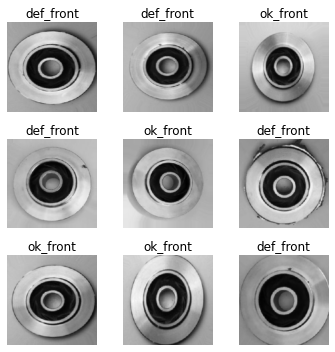

In [6]:
# Plot the first 10 images
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

# Get the first batch of images and labels
images, labels = next(training_set)

# Convert labels to integers
labels = labels.astype(np.int32)
print(labels)

# Plot the first 10 images
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


The next() function is commonly used with generators in Python to iterate through the elements one at a time. It retrieves the next item from the generator and advances the generator's internal state. In this case, it allows us to access the images and labels from the training_set generator.

## Training our Model

In [14]:
# Create a tf.data.Dataset from the training set
train_ds = tf.data.Dataset.from_generator(
    lambda: training_set,
    output_signature=(
        tf.TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)
test_ds = tf.data.Dataset.from_generator(
    lambda: testing_set,
    output_signature=(
        tf.TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



In [15]:
cnn = tf.keras.models.Sequential()

The Sequential model allows you to add layers one by one in a sequential manner. Each layer added to the model is connected to the previous layer, forming a directed acyclic graph of layers. Data flows through the layers in the same order they were added.

In [16]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[250, 250, 3], padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 35) 

Epoch 1/35
208/208 [==============================] - 261s 1s/step - loss: 0.5421 - accuracy: 0.7075 - val_loss: 0.3439 - val_accuracy: 0.8406
Epoch 2/35
208/208 [==============================] - 260s 1s/step - loss: 0.2381 - accuracy: 0.9062 - val_loss: 0.1384 - val_accuracy: 0.9455
Epoch 3/35
208/208 [==============================] - 250s 1s/step - loss: 0.1539 - accuracy: 0.9432 - val_loss: 0.1139 - val_accuracy: 0.9580
Epoch 4/35
208/208 [==============================] - 252s 1s/step - loss: 0.1040 - accuracy: 0.9629 - val_loss: 0.1136 - val_accuracy: 0.9497
Epoch 5/35
208/208 [==============================] - 264s 1s/step - loss: 0.0876 - accuracy: 0.9676 - val_loss: 0.0616 - val_accuracy: 0.9720
Epoch 6/35
208/208 [==============================] - 257s 1s/step - loss: 0.0638 - accuracy: 0.9798 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 7/35
208/208 [==============================] - 265s 1s/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.0458 - val_accuracy: 0.9874

In [19]:
#Got 86.15% accuracy without paddding
#Got 93.71% accuracy with padding and increasing epochs from 25 -> 35

1/1 [==============================] - 0s 245ms/step


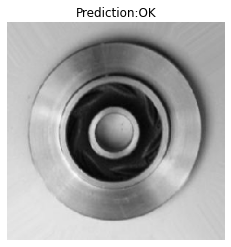

In [20]:
import matplotlib.pyplot as plt
import keras.utils as image
import numpy as np
test_image = image.load_img('FAULTDETECTION_dataset\cast_ok_0_14.jpeg', target_size = (250,250))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'OK'
    
else:
  prediction = 'DEFECTIVE'
test_image = test_image / 255.0
plt.imshow(test_image[0])
plt.title(f'Prediction:{prediction}')
plt.axis('off')
plt.show()

In [21]:
score = cnn.evaluate(testing_set)
score

23/23 [==============================] - 12s 512ms/step - loss: 0.0144 - accuracy: 0.9944


[0.014353995211422443, 0.9944055676460266]

In [24]:
cnn.save('faultdetection_cnn.h5')